In [36]:
import pandas as pd 
import matplotlib.pyplot as plt 
from  qgrid  import show_grid as show 



In [42]:
dtsqlite= pd.read_csv("sqlitelogger.csv")
dtsqlite["source"]="sqlite"
dtpostgres= pd.read_csv("postgreslogger.csv")
dtpostgres["source"]="postgres"
dtpypysqlite=pd.read_csv("pypysqlitelogger.csv")
dtpypysqlite["source"]="pypysqlitelite"
data=pd.concat([dtpostgres,dtpypysqlite,dtsqlite])
# dtsqlite2= pd.read_csv("sqlitelogger2.csv")
# dtsqlite2["source"]="sqlite2"
# dtpostgres2= pd.read_csv("postgreslogger2.csv")
# dtpostgres2["source"]="postgres2"
# data=pd.concat([data,dtpostgres2,dtsqlite2])

In [43]:
show(data.groupby(["source","name"]).count())

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [44]:
show(data.loc[data['source']=='postgres'])

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [40]:
d1=data.groupby(["source","name"]).mean()
show(d1.unstack(level=0).T)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [41]:
mins=d1.min()
d1_normalized=(d1/mins).unstack(level=0).T
show(d1_normalized)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

name                     naive_list_events  optimized_list_events  \
         source                                                     
PKG      postgres                41.924533               3.175811   
         pypysqlitelite          11.818913               1.000000   
         sqlite                  39.780643               3.252591   
DRAM     postgres                57.226656               2.915104   
         pypysqlitelite          12.786140               1.000000   
         sqlite                  33.460606               2.919940   
TIME     postgres                68.440244               3.158336   
         pypysqlitelite          12.585606               1.000000   
         sqlite                  39.721178               3.204057   
AV_POWER postgres                 1.000000               1.639470   
         pypysqlitelite           1.532631               1.630463   
         sqlite                   1.632860               1.655203   

name                     prefetch_list_events  
         source                                
PKG      postgres                   14.852413  
         pypysqlitelite              3.041485  
         sqlite                     14.854521  
DRAM     postgres                   13.872432  
         pypysqlitelite              3.499445  
         sqlite                     13.751190  
TIME     postgres                   14.916480  
         pypysqlitelite              3.062437  
         sqlite                     14.883115  
AV_POWER postgres                    1.623425  
         pypysqlitelite              1.619484  
         sqlite                      1.627251

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/boxplot.py:355: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/boxplot.py:221: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.15, top=0.9, left=0.1, right=0.9, wspace=0.2)


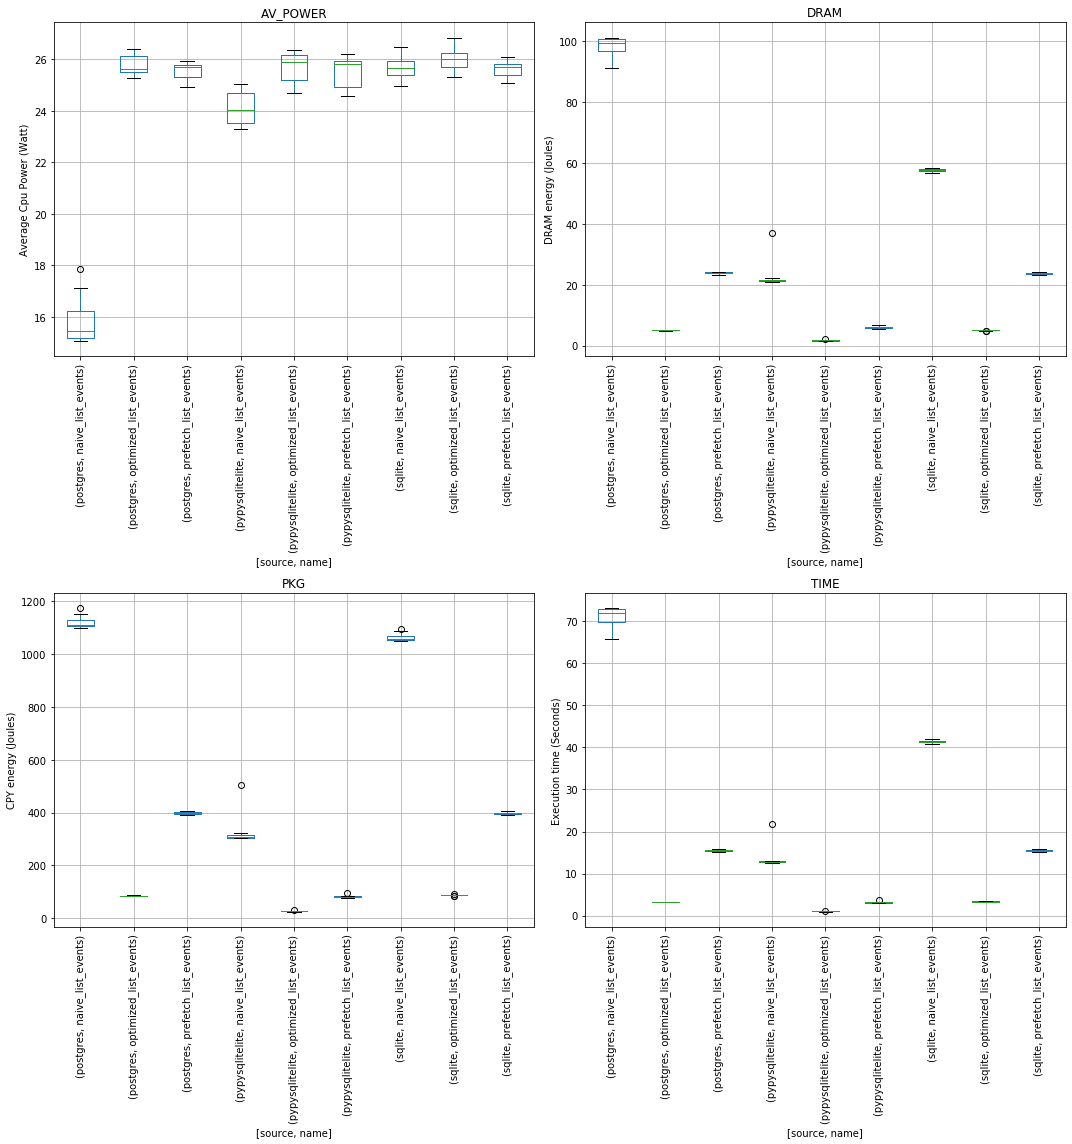

In [4]:
fig, axis = plt.subplots(2,2,figsize=(15,16),constrained_layout=True)


# data=data.loc[data["name"]=="multiprocessing"]
ax=data.boxplot(by=["source","name"],ax=axis,rot=90,return_type='axes')
# ticks=data.apply(lambda row :f"{row['name']} {row['workers']}",axis =1  ).unique()
fig.suptitle('')
ax['AV_POWER'].set_ylabel("Average Cpu Power (Watt)")
ax['PKG'].set_ylabel('CPY energy (Joules)')
ax['DRAM'].set_ylabel('DRAM energy (Joules)')
ax['TIME'].set_ylabel('Execution time (Seconds)')
fig.tight_layout()

# fig.subplots_adjust()
plt.savefig("django.png")

In [63]:
show(data.groupby(["name","source"]).mean())

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

AV_POWER    AxesSubplot(0.0402223,0.645621;0.424965x0.331115)
DRAM         AxesSubplot(0.535222,0.645621;0.424965x0.331115)
PKG         AxesSubplot(0.0402223,0.150308;0.424965x0.331115)
TIME         AxesSubplot(0.535222,0.150308;0.424965x0.331115)
dtype: object